# Notebook for graphs to the ICEA-18 paper

The data which is underlying for these graphs are saved in a compressed hdf5-database. The DataFrame contain all model predictions for 15-min intervals. There are two sets, the 20th is without AE3 in fuel line 1 and 19th is with everything.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#import seaborn as sns

In [5]:
df_out20 = pd.read_hdf('data/df_out_180320.h5','table')
df_out19 = pd.read_hdf('data/df_out_180319.h5','table')

df_out = df_out20

## Creating a iterable list of tests

In [8]:
tpot_tests = list()
linear_tests = list()

for i in range(len(list(df_out20))):
    #print(i)
    if 'tpot' in list(df_out)[i]:
        print(len(tpot_tests),' --> ', list(df_out)[i])
        tpot_tests.append(list(df_out)[i])
    if 'linear' in list(df_out)[i]:
        print(len(linear_tests),' --> ', list(df_out)[i])
        linear_tests.append(list(df_out)[i])

date1='2014-04-06'
date2='2014-04-07'

results_folder = 'results/'

0  -->  linear_model_test_0_interval_15min
0  -->  tpot_test_0_interval_15min
1  -->  linear_model_test_0_interval_30min
1  -->  tpot_test_0_interval_30min
2  -->  linear_model_test_0_interval_1h
2  -->  tpot_test_0_interval_1h
3  -->  linear_model_test_0_interval_2h
3  -->  tpot_test_0_interval_2h
4  -->  linear_model_test_0_interval_4h
4  -->  tpot_test_0_interval_4h
5  -->  linear_model_test_0_interval_8h
5  -->  tpot_test_0_interval_8h
6  -->  linear_model_test_0_interval_12h
6  -->  tpot_test_0_interval_12h
7  -->  linear_model_test_0_interval_24h
7  -->  tpot_test_0_interval_24h
8  -->  linear_model_test_0_interval_48h
8  -->  tpot_test_0_interval_48h
9  -->  linear_model_test_0_interval_72h
9  -->  tpot_test_0_interval_72h
10  -->  linear_model_test_0_interval_96h
10  -->  tpot_test_0_interval_96h
11  -->  linear_model_test_1_interval_15min
11  -->  tpot_test_1_interval_15min
12  -->  linear_model_test_1_interval_30min
12  -->  tpot_test_1_interval_30min
13  -->  linear_model_te

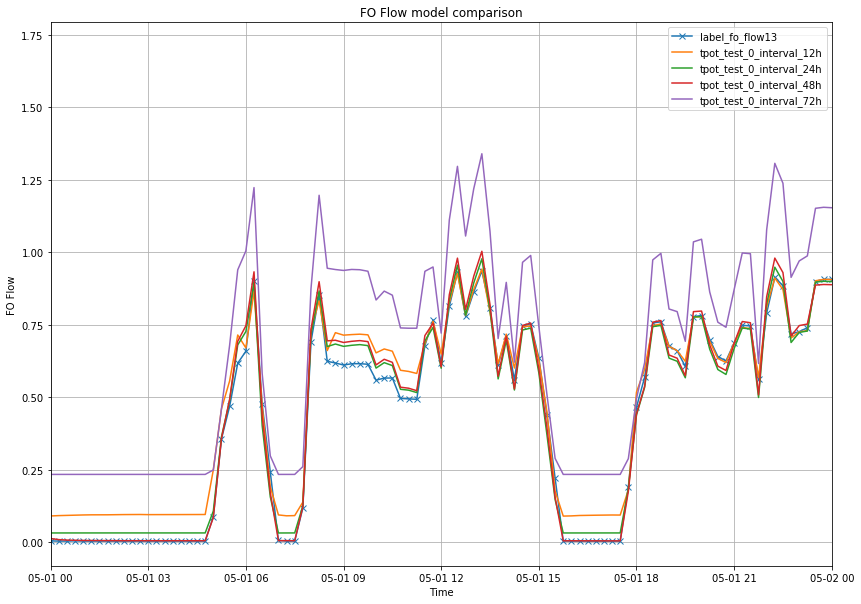

In [4]:

date1='2014-05-01'
date2='2014-05-02'

results_folder = 'results/'

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

plt.plot(df_out[list(df_out)[0]][date1:date2],marker='x')

for i in range(6,10):
    plt.plot(df_out[tpot_tests[i]][date1:date2])
#plt.plot(df_out[a[3]][date1:date2])

#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow',title='FO Flow model comparison')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
#fig.savefig(results_folder + date1 + "tpot_10gen_diff.png",dpi=1200)

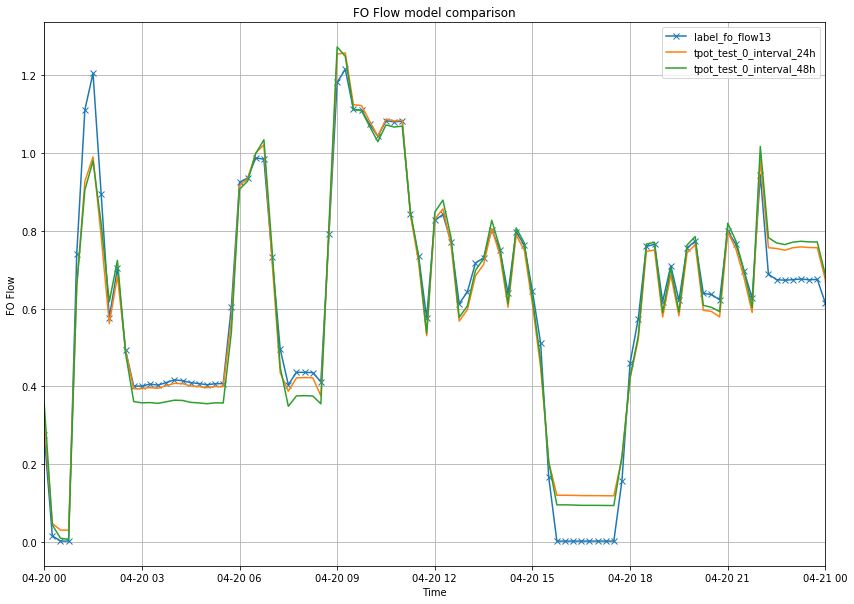

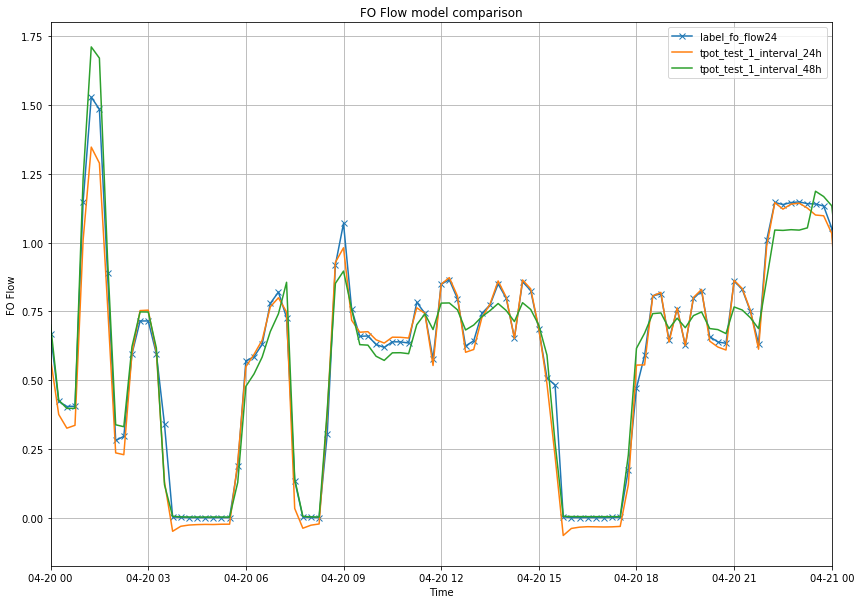

In [5]:
date1='2014-04-20'
date2='2014-04-21'

res_dpi = 300

results_folder = 'results/'

plots = [7,9]

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

plt.plot(df_out[list(df_out)[0]][date1:date2],marker='x')

for i in range(plots[0],plots[1]):
    plt.plot(df_out[tpot_tests[i]][date1:date2])
#plt.plot(df_out[a[3]][date1:date2])

#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow',title='FO Flow model comparison')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
fig.savefig(results_folder + date1 + "ae3_incl_tpot_time_13.png",dpi=res_dpi)

## Pair no 2

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

plt.plot(df_out[list(df_out)[1]][date1:date2],marker='x')

for i in range(plots[0]+11,plots[1]+11):
    plt.plot(df_out[tpot_tests[i]][date1:date2])
#plt.plot(df_out[a[3]][date1:date2])

#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow',title='FO Flow model comparison')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
fig.savefig(results_folder + date1 + "20_tpot_time_24.png",dpi=res_dpi)




## Comparision of datasets

Compare the two different models trained. The dataset named _19_ is with all features for fuel line 1 (test 0), and the set _20_ is without AE3 in test 0. Test 1 should be identical in both datasets, except it might be some very small difference in the TPOT optimisation.

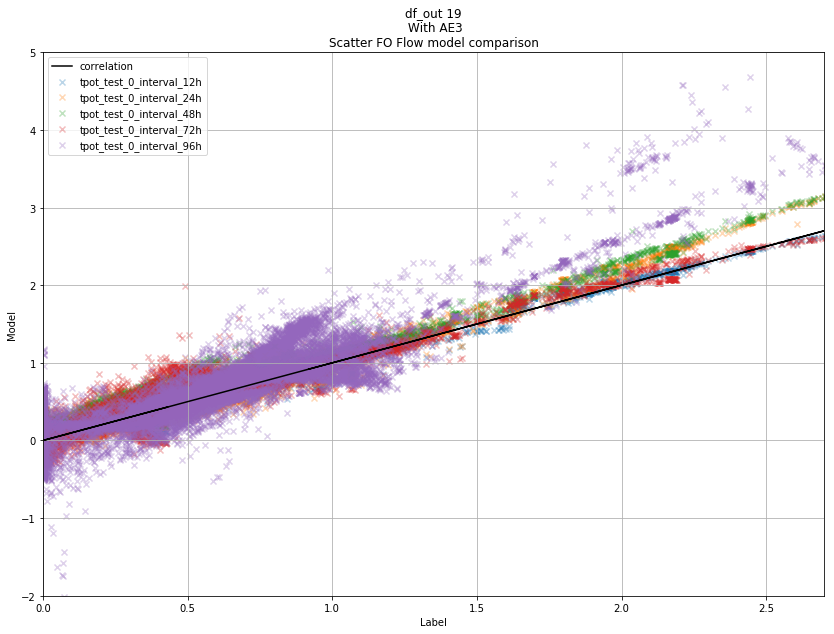

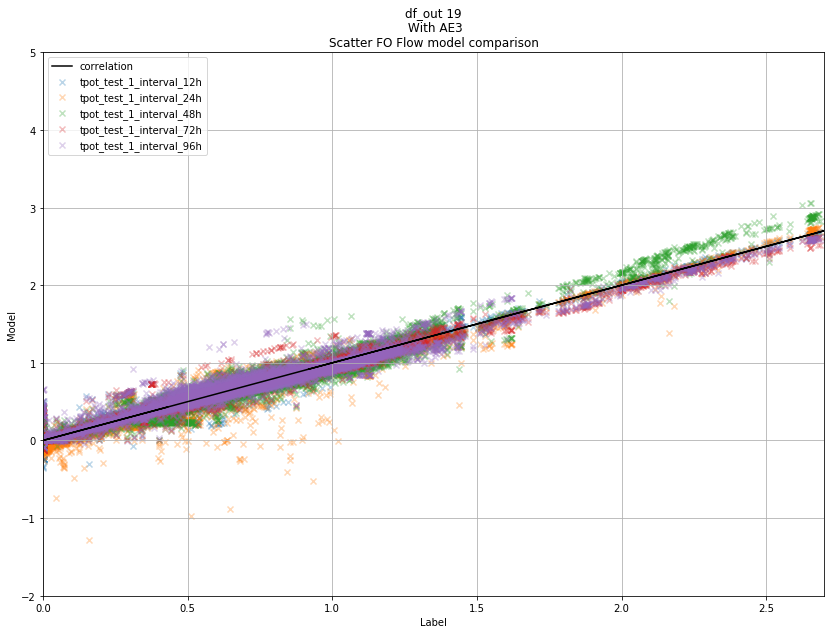

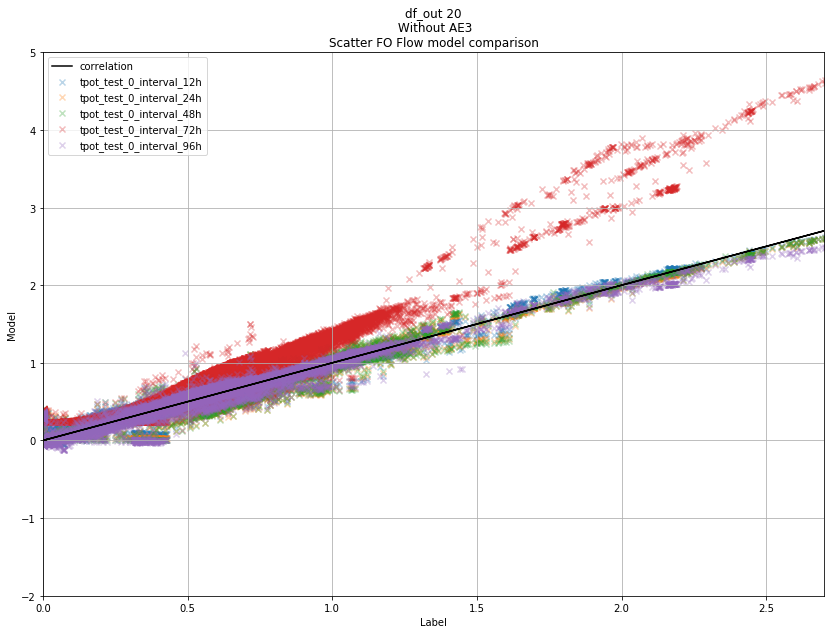

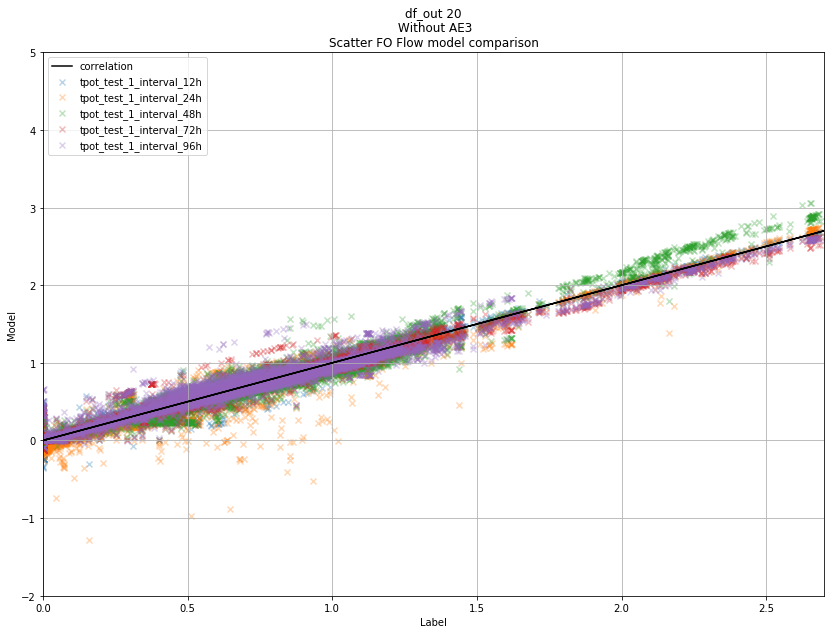

In [16]:

plots = [6,11]

x_lim = [0,2.7]
y_lim = [-2,5]

res_ = 300
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

for i in range(plots[0],plots[1]):
    plt.scatter(df_out[list(df_out19)[0]],df_out19[tpot_tests[i]],marker='x',alpha=0.3)

#plt.scatter(df_out19[list(df_out19)[0]],df_out19[list(df_out19)[0]], color='black', marker='.',label='correlation')
plt.plot(list(df_out)[0],list(df_out)[0],data=df_out, color='black', label='correlation')



ax.grid()
ax.set(xlabel='Label', ylabel='Model',title='df_out 19\n With AE3\nScatter FO Flow model comparison')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)

plt.legend(loc='upper left')
fig.savefig(results_folder + date1 + "df_out19_scatter_13.png",dpi=res_)
plt.show()


fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

for i in range(plots[0]+11,plots[1]+11):
    plt.scatter(df_out20[list(df_out20)[1]],df_out20[tpot_tests[i]],marker='x',alpha=0.3)

#plt.scatter(df_out[list(df_out20)[1]],df_out20[list(df_out)[1]], color='black', marker='.',label='correlation')
plt.plot(list(df_out)[0],list(df_out)[0],data=df_out, color='black', label='correlation')



ax.grid()
ax.set(xlabel='Label', ylabel='Model',title='df_out 19\n With AE3\nScatter FO Flow model comparison')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)

plt.legend(loc='upper left')
fig.savefig(results_folder + date1 + "df_out19_scatter_24.png",dpi=res_)


plt.show()

######

#####


plots = [6,11]

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

for i in range(plots[0],plots[1]):
    plt.scatter(df_out20[list(df_out20)[0]],df_out20[tpot_tests[i]],marker='x',alpha=0.3)

#plt.scatter(df_out20[list(df_out20)[0]],df_out20[list(df_out20)[0]], color='black', marker='.',label='correlation')
plt.plot(list(df_out)[1],list(df_out)[1],data=df_out, color='black', label='correlation')


ax.grid()
ax.set(xlabel='Label', ylabel='Model',title='df_out 20\n Without AE3\nScatter FO Flow model comparison')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)

plt.legend(loc='upper left')
fig.savefig(results_folder + date1 + "df_out20_scatter_13.png",dpi=res_)


plt.show()


fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

for i in range(plots[0]+11,plots[1]+11):
    plt.scatter(df_out[list(df_out)[1]],df_out[tpot_tests[i]],marker='x',alpha=0.3)

#plt.scatter(df_out[list(df_out)[1]],df_out[list(df_out)[1]], linewidth=1, color='black', marker='.',label='correlation')
plt.plot(list(df_out)[1],list(df_out)[1],data=df_out, color='black', label='correlation')

ax.grid()
ax.set(xlabel='Label', ylabel='Model',title='df_out 20\n Without AE3\nScatter FO Flow model comparison')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)

plt.legend(loc='upper left')
fig.savefig(results_folder + date1 + "df_out20_scatter_24.png",dpi=res_)

plt.show()



In [13]:


# Create stats for models

stats_ = [['model','MSE','r2']]

for v in tpot_tests:
    if 'test_0' in v:
        MSE = mean_squared_error(df_out[list(df_out)[0]],df_out[v])
        r2 = r2_score(df_out[list(df_out)[0]],df_out[v])
        stats_.append([v,MSE,r2])
    if 'test_1' in v:
        MSE = mean_squared_error(df_out[list(df_out)[1]],df_out[v])
        r2 = r2_score(df_out[list(df_out)[1]],df_out[v])
        stats_.append([v,MSE,r2])
        




In [15]:
stats_[1]

['tpot_test_0_interval_15min', 0.0005475125613272608, 0.9964704608161279]

In [ ]:

plots = [6,11]

x_lim = [0,2.7]
y_lim = [-2,5]

res_ = 300
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

for i in range(plots[0],plots[1]):
    plt.scatter(df_out[list(df_out19)[0]],df_out19[tpot_tests[i]],marker='x',alpha=0.3)

plt.scatter(df_out19[list(df_out19)[0]],df_out19[list(df_out19)[0]], color='black', marker='.',label='correlation')

ax.grid()
ax.set(xlabel='Label', ylabel='Model',title='df_out 19\n With AE3\nScatter FO Flow model comparison')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)

plt.legend(loc='upper left')
fig.savefig(results_folder + date1 + "df_out19_scatter_13.png",dpi=res_)
plt.show()


fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

for i in range(plots[0]+11,plots[1]+11):
    plt.scatter(df_out20[list(df_out20)[1]],df_out20[tpot_tests[i]],marker='x',alpha=0.3)

plt.scatter(df_out[list(df_out20)[1]],df_out20[list(df_out)[1]], color='black', marker='.',label='correlation')

ax.grid()
ax.set(xlabel='Label', ylabel='Model',title='df_out 19\n With AE3\nScatter FO Flow model comparison')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)

plt.legend(loc='upper left')
fig.savefig(results_folder + date1 + "df_out19_scatter_24.png",dpi=res_)


plt.show()

######

#####


plots = [6,11]

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

for i in range(plots[0],plots[1]):
    plt.scatter(df_out20[list(df_out20)[0]],df_out20[tpot_tests[i]],marker='x',alpha=0.3)

plt.scatter(df_out20[list(df_out20)[0]],df_out20[list(df_out20)[0]], color='black', marker='.',label='correlation')

ax.grid()
ax.set(xlabel='Label', ylabel='Model',title='df_out 20\n Without AE3\nScatter FO Flow model comparison')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)

plt.legend(loc='upper left')
fig.savefig(results_folder + date1 + "df_out20_scatter_13.png",dpi=res_)


plt.show()


fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

for i in range(plots[0]+11,plots[1]+11):
    plt.scatter(df_out[list(df_out)[1]],df_out[tpot_tests[i]],marker='x',alpha=0.3)

plt.scatter(df_out[list(df_out)[1]],df_out[list(df_out)[1]], color='black', marker='.',label='correlation')

ax.grid()
ax.set(xlabel='Label', ylabel='Model',title='df_out 20\n Without AE3\nScatter FO Flow model comparison')
ax.set_ylim(y_lim)
ax.set_xlim(x_lim)

plt.legend(loc='upper left')
fig.savefig(results_folder + date1 + "df_out20_scatter_24.png",dpi=res_)

plt.show()







In [ ]:

for i in range(plots[0],plots[1]):
    plt.plot(df_out[tpot_tests[i]][date1:date2])
#plt.plot(df_out[a[3]][date1:date2])

#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow',title='FO Flow model comparison')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
if save is True: fig.savefig(results_folder + date1 + "tpot_time_13.png",dpi=1200)

## Pair no 2

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

plt.plot(df_out[list(df_out)[1]][date1:date2],marker='x')

for i in range(plots[0]+11,plots[1]+11):
    plt.plot(df_out[tpot_tests[i]][date1:date2])
#plt.plot(df_out[a[3]][date1:date2])

#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow',title='FO Flow model comparison')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
if save is True: fig.savefig(results_folder + date1 + "tpot_time_24.png",dpi=1200)

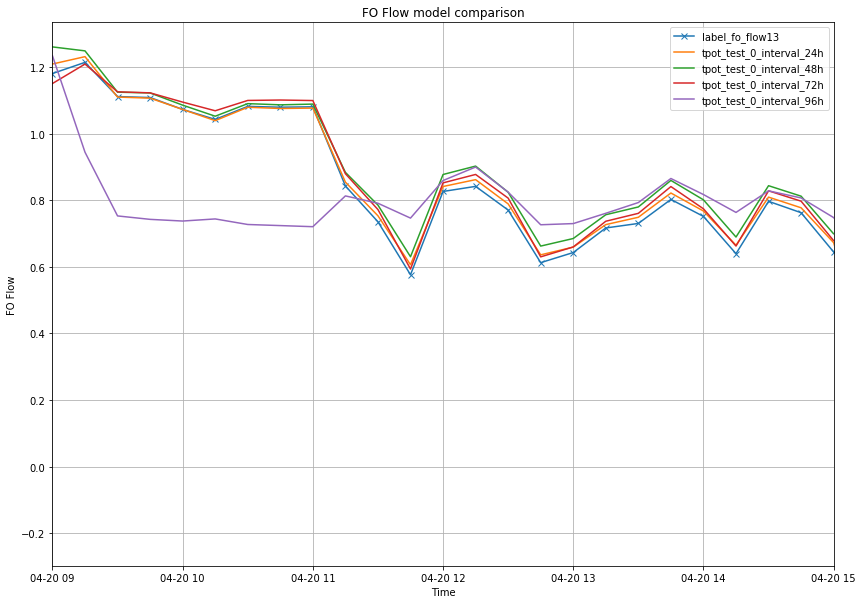

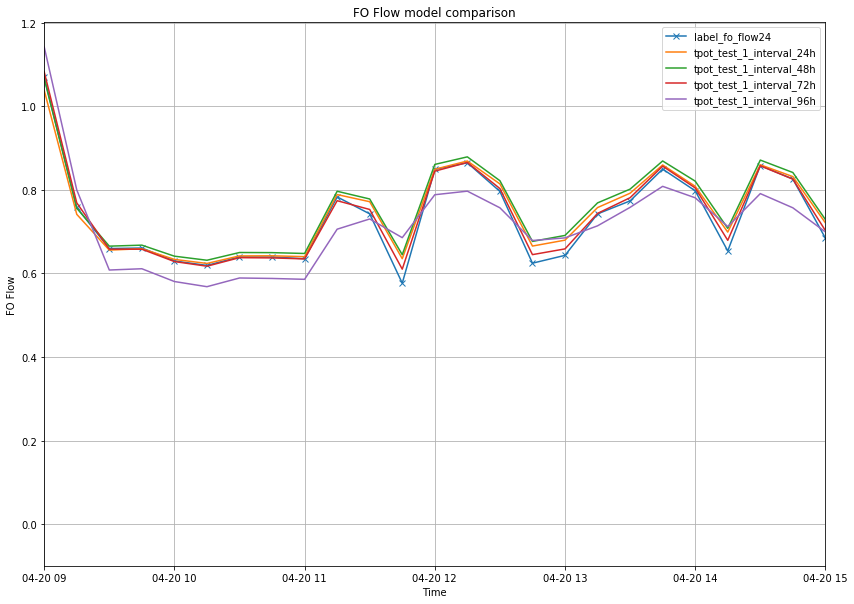

In [78]:
date1='2014-04-20 09'
date2='2014-04-20 15'

results_folder = 'results/'

save = False

plots = [7,11]

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

plt.plot(df_out[list(df_out)[0]][date1:date2],marker='x')

for i in range(plots[0],plots[1]):
    plt.plot(df_out[tpot_tests[i]][date1:date2])
#plt.plot(df_out[a[3]][date1:date2])

#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow',title='FO Flow model comparison')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
if save is True: fig.savefig(results_folder + date1 + "tpot_time_13.png",dpi=1200)

## Pair no 2

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

plt.plot(df_out[list(df_out)[1]][date1:date2],marker='x')

for i in range(plots[0]+11,plots[1]+11):
    plt.plot(df_out[tpot_tests[i]][date1:date2])
#plt.plot(df_out[a[3]][date1:date2])

#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow',title='FO Flow model comparison')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
if save is True: fig.savefig(results_folder + date1 + "tpot_time_24.png",dpi=1200)




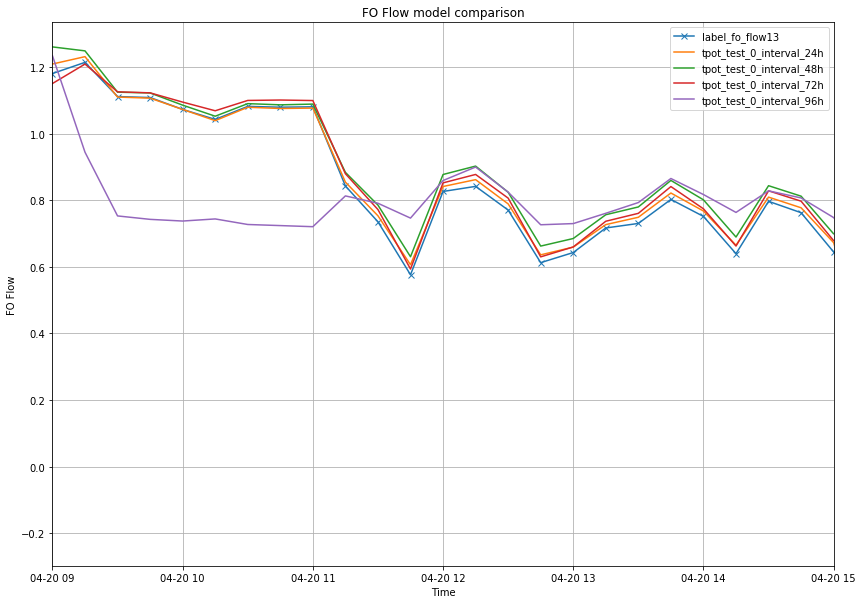

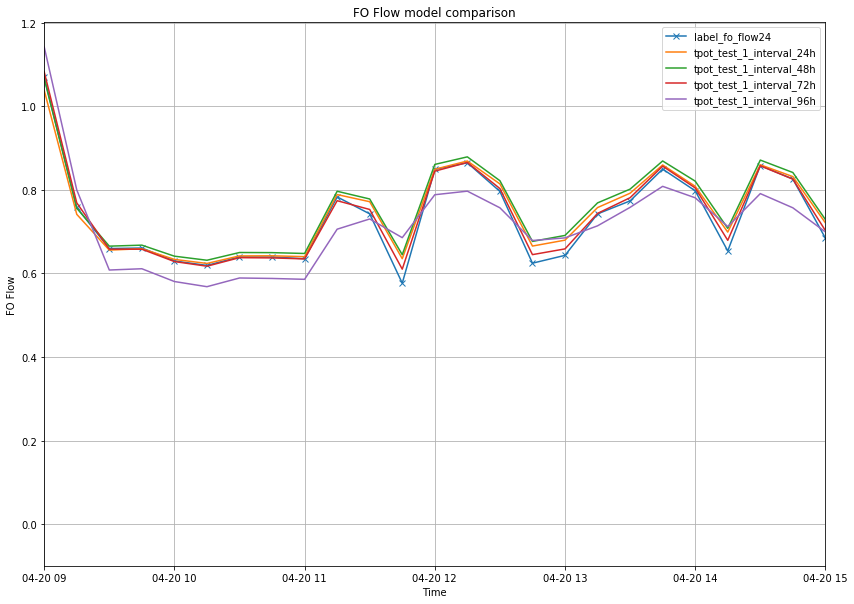

In [79]:
## Make some scatter plots


date1='2014-04-20 09'
date2='2014-04-20 15'

results_folder = 'results/'

save = False

plots = [7,11]

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

plt.plot(df_out[list(df_out)[0]][date1:date2],marker='x')

for i in range(plots[0],plots[1]):
    plt.plot(df_out[tpot_tests[i]][date1:date2])
#plt.plot(df_out[a[3]][date1:date2])

#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow',title='FO Flow model comparison')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
if save is True: fig.savefig(results_folder + date1 + "tpot_time_13.png",dpi=1200)

## Pair no 2

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

plt.plot(df_out[list(df_out)[1]][date1:date2],marker='x')

for i in range(plots[0]+11,plots[1]+11):
    plt.plot(df_out[tpot_tests[i]][date1:date2])
#plt.plot(df_out[a[3]][date1:date2])

#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow',title='FO Flow model comparison')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
if save is True: fig.savefig(results_folder + date1 + "tpot_time_24.png",dpi=1200)





NameError: name 'df_out_diff' is not defined

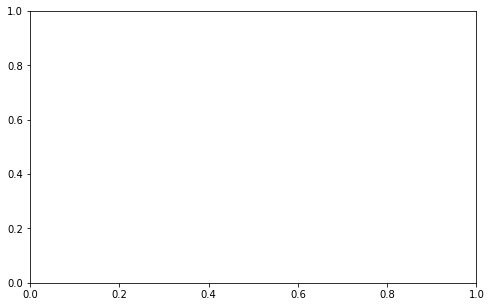

In [9]:

# Make graphs with top models

runs = ['linear','tpot','autosk']
lin_best = [29,26]
tpot_best = [29,26]
autosk_best = [26,22]

fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

for run_ in runs:

    if run_ == 'linear':
        for i in lin_best:
            plt.plot(df_out_diff[run_ + '_test_no_'+str(i)][date1:date2],label=run_ + ' test '+str(i))
    if run_ == 'tpot':
        for i in tpot_best:
            plt.plot(df_out_diff[run_ + '_test_no_'+str(i)][date1:date2],label=run_ + ' test '+str(i))
    if run_ == 'autosk':
        for i in autosk_best:
            plt.plot(df_out_diff[run_ + '_test_no_'+str(i)][date1:date2],label=run_ + ' test '+str(i))

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow model difference',title='FO Flow model difference\n Linear, TPOT and auto-sklearn')
ax.set_ylim(-0.05,0.05)
plt.legend(loc='upper right')
plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
fig.savefig(results_folder + date1 + "_diff_best_test.png",dpi=1200)